In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
crime_data = pd.read_excel('./crime/data_final/data_total_2020.xlsx')
crime_data.head()

,기간,자치구,인구 수(명),면적(㎢),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
0,2020,강남구,544055,39.50,7356,23,7,3455,803,162,535,14326,787,21.4,6.73
1,2020,강동구,463998,24.59,3788,17,7,1051,364,125,392,7952,331,19.2,6.48
2,2020,강북구,311569,23.60,2770,15,5,681,266,84,416,4301,272,19.1,6.57
3,2020,강서구,585901,41.44,4415,13,7,1399,518,175,600,9552,538,20.4,6.31
4,2020,관악구,509803,29.57,5261,20,5,1105,430,113,466,5588,412,16.6,6.54


In [46]:
crime_data.drop(columns='기간', inplace=True)

In [47]:
crime_data['범죄발생건수(10만명 당)'] = crime_data['범죄발생건수'] / crime_data['인구 수(명)'] * 100000
crime_data.head()

,자치구,인구 수(명),면적(㎢),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄발생건수(10만명 당)
0,강남구,544055,39.50,7356,23,7,3455,803,162,535,14326,787,21.4,6.73,1352.069184
1,강동구,463998,24.59,3788,17,7,1051,364,125,392,7952,331,19.2,6.48,816.382829
2,강북구,311569,23.60,2770,15,5,681,266,84,416,4301,272,19.1,6.57,889.048654
3,강서구,585901,41.44,4415,13,7,1399,518,175,600,9552,538,20.4,6.31,753.540274
4,관악구,509803,29.57,5261,20,5,1105,430,113,466,5588,412,16.6,6.54,1031.967250


In [48]:
crime_data['면적당_경찰관서_수'] = crime_data['경찰관서 수'] / crime_data['면적(㎢)']
crime_data['면적당_소방관서_수'] = crime_data['소방관서 수'] / crime_data['면적(㎢)']
crime_data['면적당_카페_수'] = crime_data['카페 수'] / crime_data['면적(㎢)']
crime_data['면적당_편의점_수'] = crime_data['편의점 수'] / crime_data['면적(㎢)']
crime_data['면적당_공원_수'] = crime_data['공원 수'] / crime_data['면적(㎢)']
crime_data['면적당_버스정류장_수'] = crime_data['버스정류장 수'] / crime_data['면적(㎢)']
crime_data['면적당_가로등_수'] = crime_data['가로등 수'] / crime_data['면적(㎢)']
crime_data['면적당_ATM_수'] = crime_data['ATM 수'] / crime_data['면적(㎢)']

crime_data.head()

,자치구,인구 수(명),면적(㎢),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,...,행복지수 종합,범죄발생건수(10만명 당),면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수
0,강남구,544055,39.50,7356,23,7,3455,803,162,535,...,6.73,1352.069184,0.582278,0.177215,87.468354,20.329114,4.101266,13.544304,362.683544,19.924051
1,강동구,463998,24.59,3788,17,7,1051,364,125,392,...,6.48,816.382829,0.691338,0.284669,42.740952,14.802765,5.083367,15.941440,323.383489,13.460756
2,강북구,311569,23.60,2770,15,5,681,266,84,416,...,6.57,889.048654,0.635593,0.211864,28.855932,11.271186,3.559322,17.627119,182.245763,11.525424
3,강서구,585901,41.44,4415,13,7,1399,518,175,600,...,6.31,753.540274,0.313707,0.168919,33.759653,12.500000,4.222973,14.478764,230.501931,12.982625
4,관악구,509803,29.57,5261,20,5,1105,430,113,466,...,6.54,1031.967250,0.676361,0.169090,37.368955,14.541765,3.821441,15.759215,188.975313,13.933040


In [49]:
crime_data.drop(columns=['인구 수(명)','면적(㎢)','범죄발생건수','경찰관서 수','소방관서 수', '카페 수', '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수'], inplace=True)

In [50]:
crime_data.set_index('자치구', inplace=True)
crime_data.head()

,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄발생건수(10만명 당),면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수
자치구,,,,,,,,,,,
강남구,21.4,6.73,1352.069184,0.582278,0.177215,87.468354,20.329114,4.101266,13.544304,362.683544,19.924051
강동구,19.2,6.48,816.382829,0.691338,0.284669,42.740952,14.802765,5.083367,15.941440,323.383489,13.460756
강북구,19.1,6.57,889.048654,0.635593,0.211864,28.855932,11.271186,3.559322,17.627119,182.245763,11.525424
강서구,20.4,6.31,753.540274,0.313707,0.168919,33.759653,12.500000,4.222973,14.478764,230.501931,12.982625
관악구,16.6,6.54,1031.967250,0.676361,0.169090,37.368955,14.541765,3.821441,15.759215,188.975313,13.933040


In [51]:
crime_data.sort_values(by='범죄발생건수(10만명 당)', ascending=False).head()

,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄발생건수(10만명 당),면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수
자치구,,,,,,,,,,,
중구,19.1,6.44,2533.516545,2.008032,0.702811,150.502008,34.738956,7.530120,19.979920,858.433735,41.465863
종로구,18.7,6.46,1950.992478,1.045588,0.292765,83.270598,12.463404,4.391468,15.516520,368.799665,13.383522
강남구,21.4,6.73,1352.069184,0.582278,0.177215,87.468354,20.329114,4.101266,13.544304,362.683544,19.924051
영등포구,22.0,6.76,1280.663382,0.651731,0.244399,60.651731,19.063136,4.439919,19.755601,388.391039,18.737271
용산구,21.7,6.30,1213.595209,0.594422,0.274348,54.229538,11.614083,4.938272,15.043439,358.390489,12.299954


In [52]:
# print(np.corrcoef(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)']))
# print(np.corrcoef(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)']))

In [53]:
import matplotlib.pyplot as plt

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Linux':
    plt.rc('font', family = 'NanumBarunGothic')
else:
    print('Unknown system')

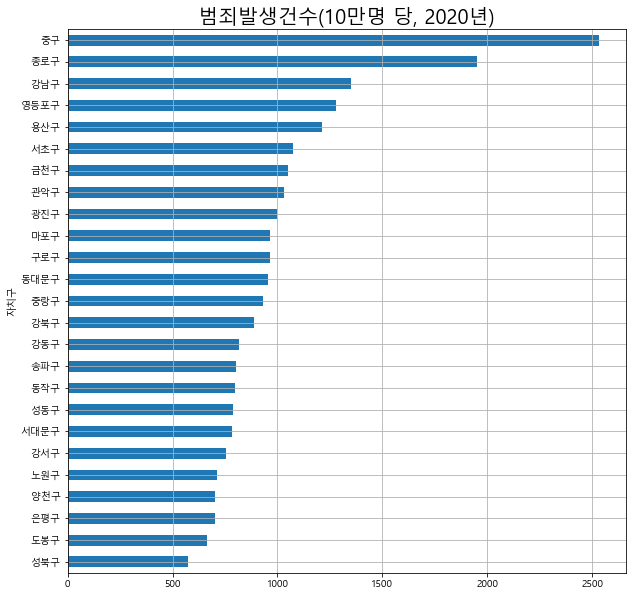

In [93]:
plt.figure(figsize = (10,10))
crime_data['범죄발생건수(10만명 당)'].sort_values().plot(kind = 'barh', grid = True)
plt.title('범죄발생건수(10만명 당, 2020년)', fontsize = 20)
plt.show()

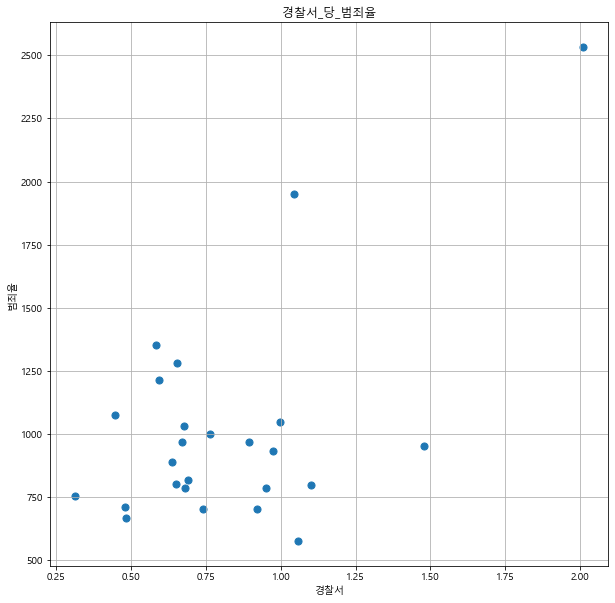

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
plt.title('경찰서_당_범죄율')
plt.xlabel('경찰서')
plt.ylabel('범죄율')
plt.grid()
plt.show()

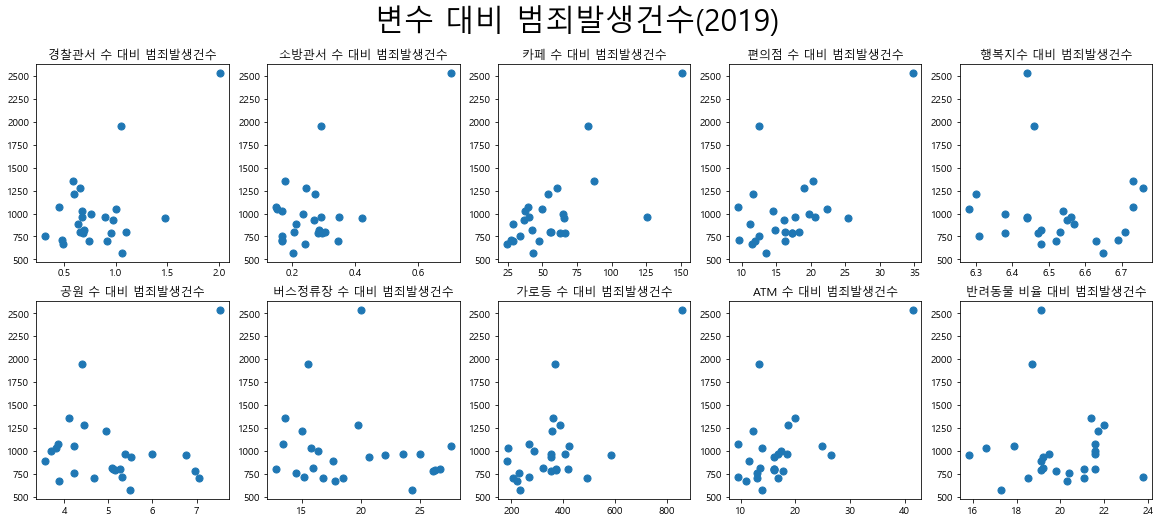

In [56]:
f, axes = plt.subplots(2,5)
f.set_size_inches((20,8))
axes[0,0].scatter(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[0,0].set_title('경찰관서 수 대비 범죄발생건수')
axes[0,1].scatter(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[0,1].set_title('소방관서 수 대비 범죄발생건수')
axes[0,2].scatter(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[0,2].set_title('카페 수 대비 범죄발생건수')
axes[0,3].scatter(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[0,3].set_title('편의점 수 대비 범죄발생건수')
axes[1,0].scatter(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[1,0].set_title('공원 수 대비 범죄발생건수')
axes[1,1].scatter(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[1,1].set_title('버스정류장 수 대비 범죄발생건수')
axes[1,2].scatter(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[1,2].set_title('가로등 수 대비 범죄발생건수')
axes[1,3].scatter(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[1,3].set_title('ATM 수 대비 범죄발생건수')
axes[0,4].scatter(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[0,4].set_title('행복지수 대비 범죄발생건수')
axes[1,4].scatter(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'], s= 50)
axes[1,4].set_title('반려동물 비율 대비 범죄발생건수')

f.suptitle('변수 대비 범죄발생건수(2019)', fontsize = 30)



plt.show()

In [57]:
fp = np.polyfit(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], 1)
fp

array([676.24348899, 457.20182733])

In [58]:
fp = np.polyfit(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f = np.poly1d(fp)
fx = np.linspace(0.25, 2, 10)


crime_data['경찰서_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f(crime_data['면적당_경찰관서_수']))

df_sort = crime_data.sort_values(by = '경찰서_오차', ascending=False)

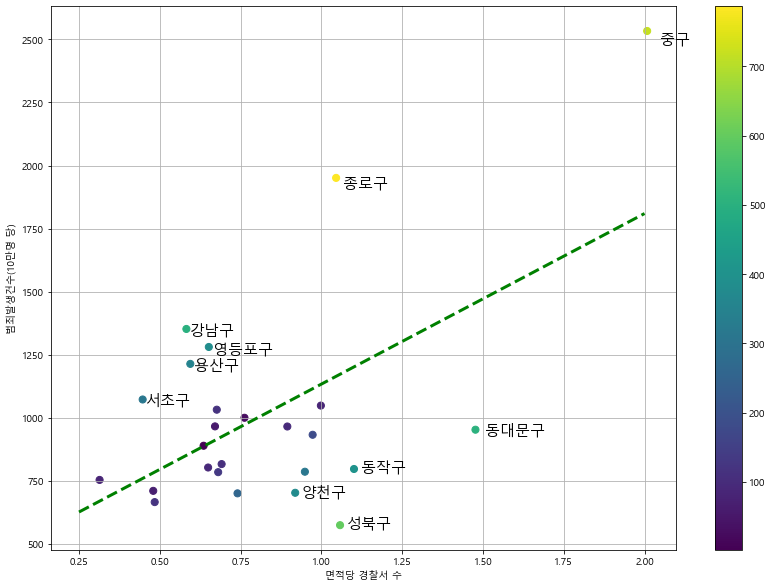

In [59]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['경찰서_오차'], s= 50)
plt.plot(fx, f(fx), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_경찰관서_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 경찰서 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [60]:
fp9 = np.polyfit(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f9 = np.poly1d(fp9)
fx9 = np.linspace(0.2, 0.7, 10)


crime_data['소방서_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f9(crime_data['면적당_소방관서_수']))

df_sort = crime_data.sort_values(by = '소방서_오차', ascending=False)

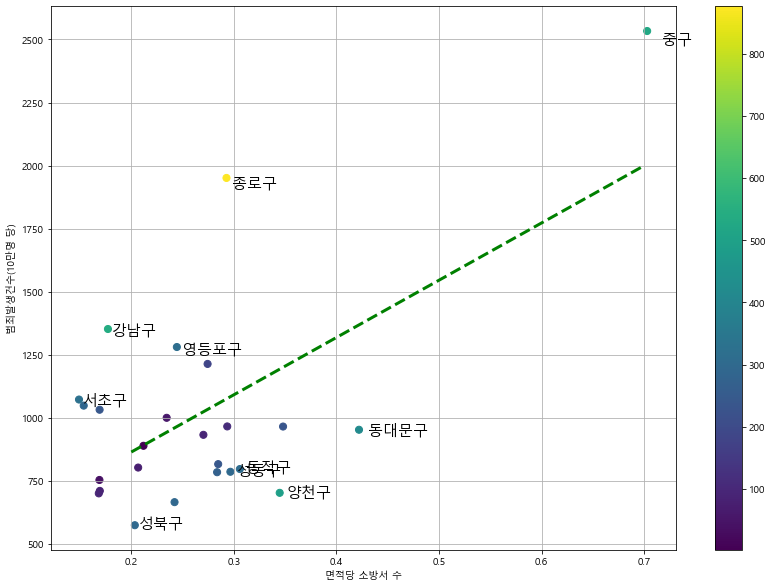

In [61]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['소방서_오차'], s= 50)
plt.plot(fx9, f9(fx9), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_소방관서_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 소방서 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [62]:
fp3 = np.polyfit(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f3 = np.poly1d(fp3)
fx3 = np.linspace(20, 150, 10)

crime_data['카페_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f3(crime_data['면적당_카페_수']))

df_sort = crime_data.sort_values(by = '카페_오차', ascending=False)

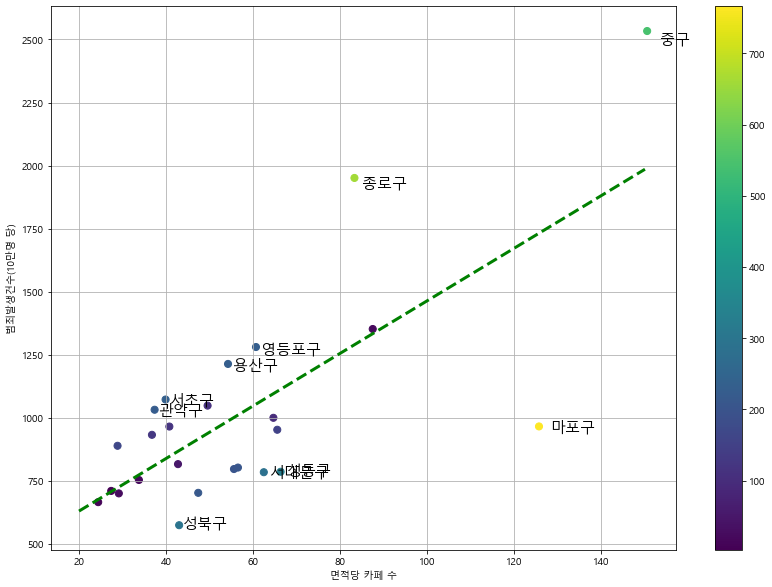

In [63]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['카페_오차'], s= 50)
plt.plot(fx3, f3(fx3), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_카페_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 카페 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [64]:
fp4 = np.polyfit(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f4 = np.poly1d(fp4)
fx4 = np.linspace(10, 35, 10)

crime_data['편의점_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f4(crime_data['면적당_편의점_수']))

df_sort = crime_data.sort_values(by = '편의점_오차', ascending=False)

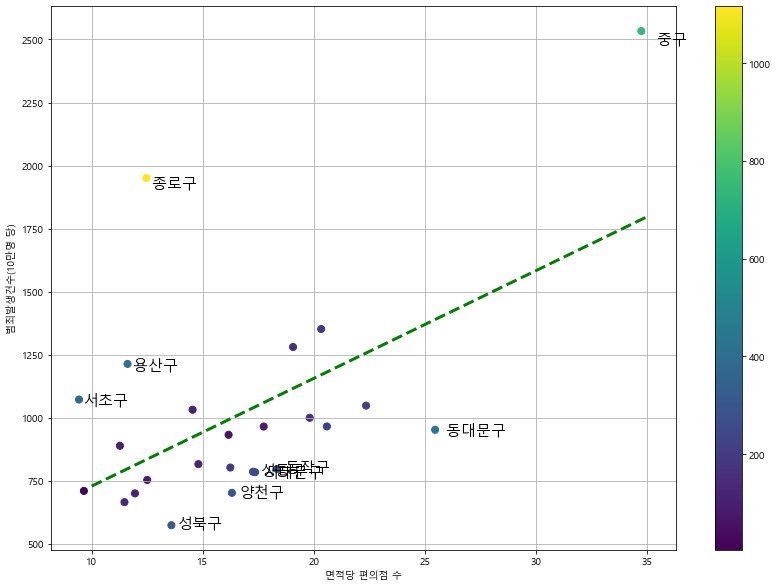

In [65]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['편의점_오차'], s= 50)
plt.plot(fx4, f4(fx4), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_편의점_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 편의점 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [66]:
fp5 = np.polyfit(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f5 = np.poly1d(fp5)
fx5 = np.linspace(3.5, 7.5, 10)

crime_data['공원_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f5(crime_data['면적당_공원_수']))

df_sort = crime_data.sort_values(by = '공원_오차', ascending=False)

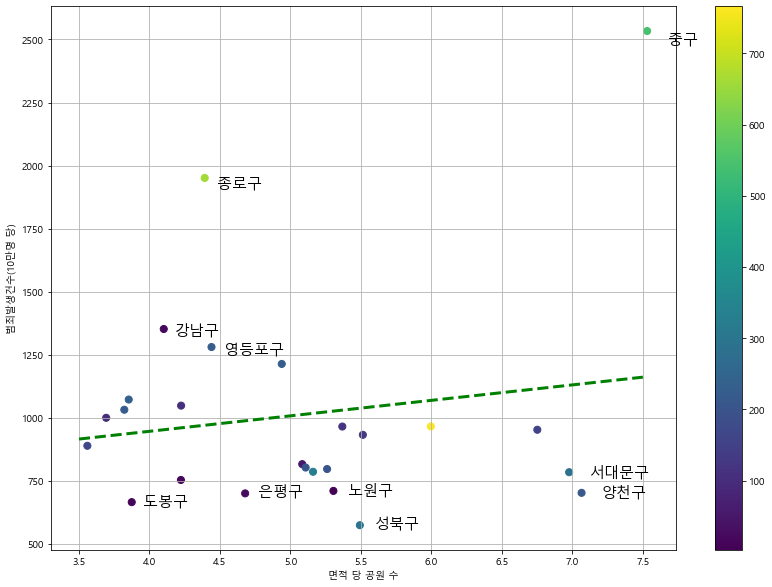

In [67]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['카페_오차'], s= 50)
plt.plot(fx5, f5(fx5), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_공원_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적 당 공원 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [68]:
fp6 = np.polyfit(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f6 = np.poly1d(fp6)
fx6 = np.linspace(12, 28, 10)

crime_data['버스정류장_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f6(crime_data['면적당_버스정류장_수']))

df_sort = crime_data.sort_values(by = '버스정류장_오차', ascending=False)

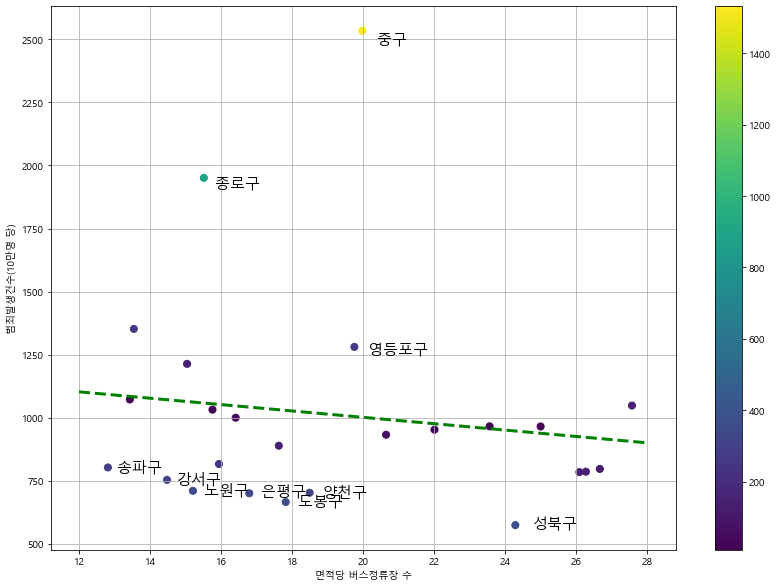

In [69]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['버스정류장_오차'], s= 50)
plt.plot(fx6, f6(fx6), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_버스정류장_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 버스정류장 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [70]:
fp7 = np.polyfit(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f7 = np.poly1d(fp7)
fx7 = np.linspace(100, 900, 10)

crime_data['가로등_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f7(crime_data['면적당_가로등_수']))

df_sort = crime_data.sort_values(by = '가로등_오차', ascending=False)

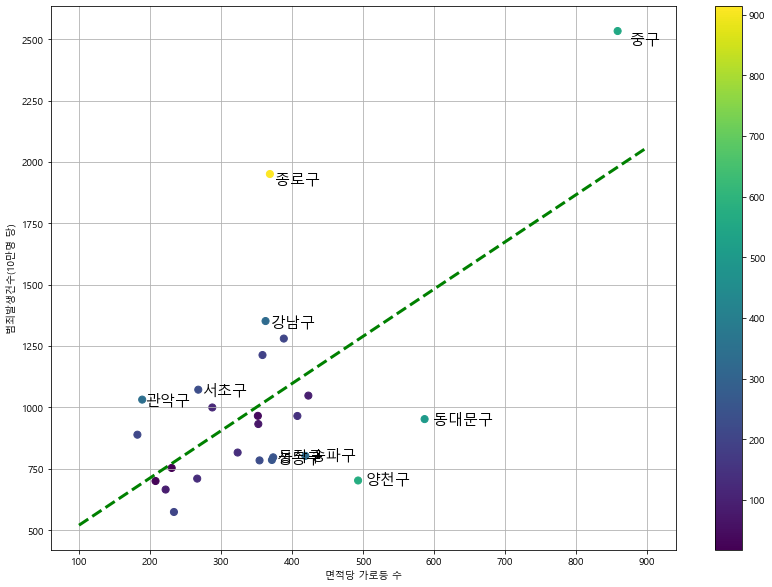

In [71]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['가로등_오차'], s= 50)
plt.plot(fx7, f7(fx7), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_가로등_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 가로등 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [72]:
fp8 = np.polyfit(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'], 1)

f8 = np.poly1d(fp8)
fx8 = np.linspace(10, 40, 10)

crime_data['ATM_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f8(crime_data['면적당_ATM_수']))

df_sort = crime_data.sort_values(by = 'ATM_오차', ascending=False)

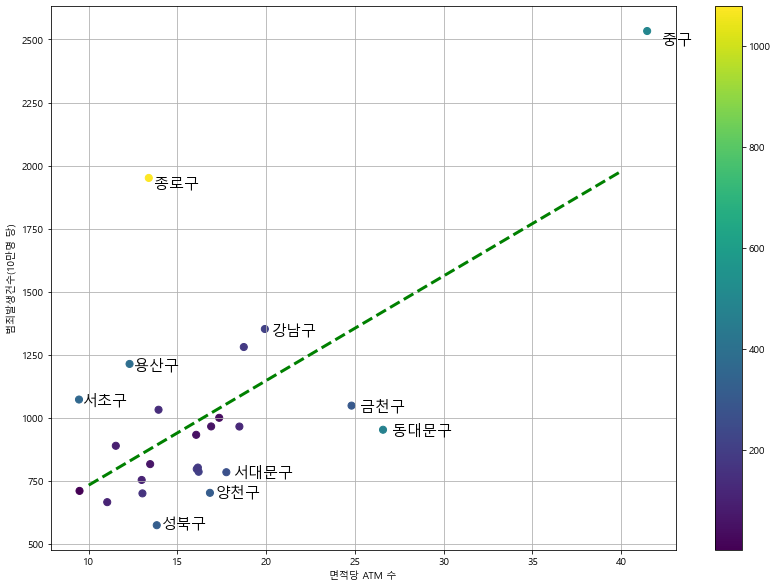

In [73]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['ATM_오차'], s= 50)
plt.plot(fx8, f8(fx8), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['면적당_ATM_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('면적당 ATM 수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [74]:
fp10 = np.polyfit(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'], 1)

f10 = np.poly1d(fp10)
fx10 = np.linspace(6.4, 7.2, 10)

crime_data['행복지수_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f10(crime_data['행복지수 종합']))

df_sort = crime_data.sort_values(by = '행복지수_오차', ascending=False)

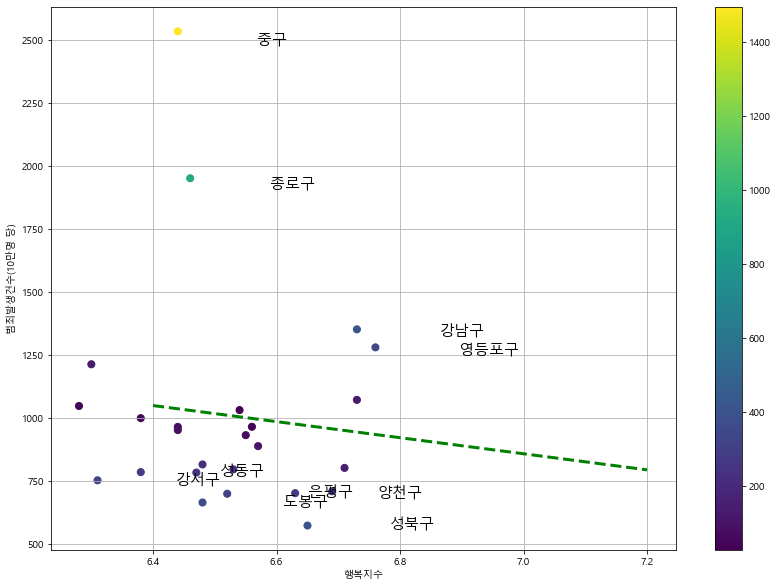

In [75]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['행복지수_오차'], s= 50)
plt.plot(fx10, f10(fx10), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['행복지수 종합'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('행복지수')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

In [76]:
fp11 = np.polyfit(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'], 1)

f11 = np.poly1d(fp11)
fx11 = np.linspace(17, 25, 10)

crime_data['반려동물_오차'] = np.abs(crime_data['범죄발생건수(10만명 당)'] - f10(crime_data['반려동물 가구 비율(%, 인구 수)']))

df_sort = crime_data.sort_values(by = '반려동물_오차', ascending=False)

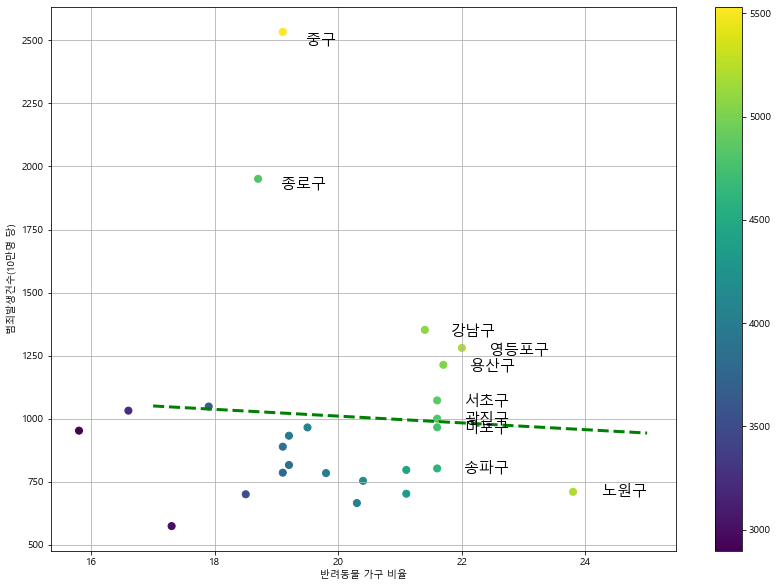

In [77]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['반려동물_오차'], s= 50)
plt.plot(fx11, f11(fx11), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['반려동물 가구 비율(%, 인구 수)'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('반려동물 가구 비율')
plt.ylabel('범죄발생건수(10만명 당)')

plt.colorbar()
plt.grid()
plt.show()

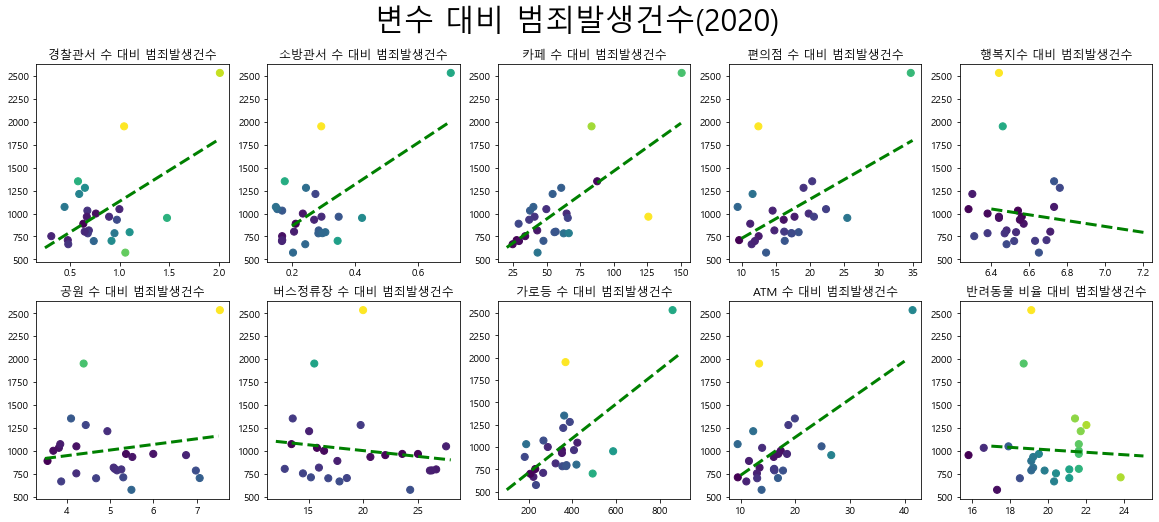

In [92]:
f2, axes2 = plt.subplots(2,5)
f2.set_size_inches((20,8))

axes2[0,0].scatter(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['경찰서_오차'], s= 50)
axes2[0,0].plot(fx, f(fx), ls = '--', lw=3, color='g')
axes2[0,0].set_title('경찰관서 수 대비 범죄발생건수', fontsize=12)
axes2[0,1].scatter(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['소방서_오차'], s= 50)
axes2[0,1].plot(fx9, f9(fx9), ls = '--', lw=3, color='g')
axes2[0,1].set_title('소방관서 수 대비 범죄발생건수', fontsize=12)
axes2[0,2].scatter(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['카페_오차'], s= 50)
axes2[0,2].plot(fx3, f3(fx3), ls = '--', lw=3, color='g')
axes2[0,2].set_title('카페 수 대비 범죄발생건수', fontsize=12)
axes2[0,3].scatter(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['편의점_오차'], s= 50)
axes2[0,3].plot(fx4, f4(fx4), ls = '--', lw=3, color='g')
axes2[0,3].set_title('편의점 수 대비 범죄발생건수', fontsize=12)
axes2[1,0].scatter(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['공원_오차'], s= 50)
axes2[1,0].plot(fx5, f5(fx5), ls = '--', lw=3, color='g')
axes2[1,0].set_title('공원 수 대비 범죄발생건수', fontsize=12)
axes2[1,1].scatter(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['버스정류장_오차'], s= 50)
axes2[1,1].plot(fx6, f6(fx6), ls = '--', lw=3, color='g')
axes2[1,1].set_title('버스정류장 수 대비 범죄발생건수', fontsize=12)
axes2[1,2].scatter(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['가로등_오차'], s= 50)
axes2[1,2].plot(fx7, f7(fx7), ls = '--', lw=3, color='g')
axes2[1,2].set_title('가로등 수 대비 범죄발생건수', fontsize=12)
axes2[1,3].scatter(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['ATM_오차'], s= 50)
axes2[1,3].plot(fx8, f8(fx8), ls = '--', lw=3, color='g')
axes2[1,3].set_title('ATM 수 대비 범죄발생건수', fontsize=12)

axes2[0,4].scatter(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['행복지수_오차'], s= 50)
axes2[0,4].plot(fx10, f10(fx10), ls = '--', lw=3, color='g')
axes2[0,4].set_title('행복지수 대비 범죄발생건수', fontsize=12)
axes2[1,4].scatter(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'], c=crime_data['반려동물_오차'], s= 50)
axes2[1,4].plot(fx11, f11(fx11), ls = '--', lw=3, color='g')
axes2[1,4].set_title('반려동물 비율 대비 범죄발생건수', fontsize=12)



f2.suptitle('변수 대비 범죄발생건수(2020)', fontsize = 30)

plt.show()

# for n in range(10):
#     axes2[0,0].text(df_sort['면적당_ATM_수'][n]*1.02, df_sort['범죄발생건수(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 10)

In [79]:
# from scipy import stats

# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_경찰관서_수'], 'norm', args = (crime_data.loc[:,'면적당_경찰관서_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_소방관서_수'], 'norm', args = (crime_data.loc[:,'면적당_소방관서_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_카페_수'], 'norm', args = (crime_data.loc[:,'면적당_카페_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_편의점_수'], 'norm', args = (crime_data.loc[:,'면적당_편의점_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_공원_수'], 'norm', args = (crime_data.loc[:,'면적당_공원_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_버스정류장_수'], 'norm', args = (crime_data.loc[:,'면적당_버스정류장_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_가로등_수'], 'norm', args = (crime_data.loc[:,'면적당_가로등_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.kstest(crime_data.loc[:,'면적당_ATM_수'], 'norm', args = (crime_data.loc[:,'면적당_ATM_수'].mean(), crime_data.loc[:,'면적당_경찰관서_수'].var()**0.5))
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))

In [80]:
# from scipy import stats

# test_stat, p_val = stats.shapiro(crime_data['면적당_경찰관서_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_소방관서_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_카페_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_편의점_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_공원_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_버스정류장_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_가로등_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.shapiro(crime_data['면적당_ATM_수'])
# print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))


In [81]:
from scipy import stats

test_stat, p_val = stats.shapiro(crime_data['면적당_경찰관서_수'])
print("정규성 검정 : {}, p-value : {}".format('경찰관서 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_소방관서_수'])
print("정규성 검정 : {}, p-value : {}".format('소방관서 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_카페_수'])
print("정규성 검정 : {}, p-value : {}".format('카페 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_편의점_수'])
print("정규성 검정 : {}, p-value : {}".format('편의점 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_공원_수'])
print("정규성 검정 : {}, p-value : {}".format('공원 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_버스정류장_수'])
print("정규성 검정 : {}, p-value : {}".format('버스정류장 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_가로등_수'])
print("정규성 검정 : {}, p-value : {}".format('가로등 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['면적당_ATM_수'])
print("정규성 검정 : {}, p-value : {}".format('ATM 수', p_val))
test_stat, p_val = stats.shapiro(crime_data['행복지수 종합'])
print("정규성 검정 : {}, p-value : {}".format('행복지수', p_val))
test_stat, p_val = stats.shapiro(crime_data['반려동물 가구 비율(%, 인구 수)'])
print("정규성 검정 : {}, p-value : {}".format('반려동물 비율', p_val))

정규성 검정 : 경찰관서 수, p-value : 0.0025491188280284405
정규성 검정 : 소방관서 수, p-value : 6.988405948504806e-05
정규성 검정 : 카페 수, p-value : 0.0005175365367904305
정규성 검정 : 편의점 수, p-value : 0.012225857935845852
정규성 검정 : 공원 수, p-value : 0.0678173303604126
정규성 검정 : 버스정류장 수, p-value : 0.0438225232064724
정규성 검정 : 가로등 수, p-value : 0.0007668876205570996
정규성 검정 : ATM 수, p-value : 7.64516371418722e-05
정규성 검정 : 행복지수, p-value : 0.43921545147895813
정규성 검정 : 반려동물 비율, p-value : 0.518108069896698


In [82]:
print(stats.pearsonr(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.pearsonr(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)']))

(0.5639406598398619, 0.003324013922176375)
(0.6128698721208451, 0.0011254743491122357)
(0.729005897137814, 3.573436710130083e-05)
(0.5584607867924691, 0.0037149385119794173)
(0.1609397520981141, 0.44217141338291827)
(-0.13926719460402814, 0.5067329096403228)
(0.6437306228428499, 0.0005166503658630953)
(0.6425833650538921, 0.0005326237553088067)


In [83]:
print(stats.spearmanr(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)']))
print(stats.spearmanr(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)']))

SpearmanrResult(correlation=0.07846153846153846, pvalue=0.7092983704196518)
SpearmanrResult(correlation=0.10538461538461538, pvalue=0.6161273255695086)
SpearmanrResult(correlation=0.5430769230769231, pvalue=0.005026431681323537)
SpearmanrResult(correlation=0.36923076923076925, pvalue=0.06930331713211779)
SpearmanrResult(correlation=-0.21153846153846154, pvalue=0.31006337883220825)
SpearmanrResult(correlation=-0.1815384615384615, pvalue=0.38513664752146737)
SpearmanrResult(correlation=0.36692307692307696, pvalue=0.0711974136069985)
SpearmanrResult(correlation=0.38, pvalue=0.060969856136655204)
SpearmanrResult(correlation=0.09259303361365515, pvalue=0.6597843772166178)
SpearmanrResult(correlation=-0.08280384953968553, pvalue=0.6939502693356763)


In [84]:
# crime_data.to_excel('./data_preprocess_2020.xlsx')

In [85]:
s_corr = []
s_pv = []
s_corr.append(stats.spearmanr(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_경찰관서_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_소방관서_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_카페_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_편의점_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_공원_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_버스정류장_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_가로등_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['면적당_ATM_수'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['행복지수 종합'], crime_data['범죄발생건수(10만명 당)'])[1])
s_corr.append(stats.spearmanr(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'])[0])
s_pv.append(stats.spearmanr(crime_data['반려동물 가구 비율(%, 인구 수)'], crime_data['범죄발생건수(10만명 당)'])[1])

In [86]:
item_list = ['경찰관서', '소방관서', '카페', '편의점', '공원', '버스정류장', '가로등', 'ATM','행복지수', '반려동물']

In [87]:
s_result = pd.DataFrame(data = [item_list,s_corr, s_pv])

In [88]:
s_result.rename(columns=s_result.iloc[0], inplace=True)

In [89]:
s_result.drop(0, inplace=True)

In [90]:
s_result['Spearman'] = ['correlation', 'p-value']

In [91]:
s_result.set_index('Spearman')

,경찰관서,소방관서,카페,편의점,공원,버스정류장,가로등,ATM,행복지수,반려동물
Spearman,,,,,,,,,,
correlation,0.078462,0.105385,0.543077,0.369231,-0.211538,-0.181538,0.366923,0.38,-0.082804,0.092593
p-value,0.709298,0.616127,0.005026,0.069303,0.310063,0.385137,0.071197,0.06097,0.69395,0.659784
